# An Analysis of Bike Sharing and Weather Datasets

Tutorial by Uyen Nguyen, CMSC 320

## I. Motivations of This Study

This tutorial aims to analyze bike sharing and weather data for bicycle usage patterns. The results and methodologies from this study can be used by city governments for future planning and decision making to improve bike-sharing programs. 

Bike share programs have become increasing popular worldwide in recent years, particularly, in large cities where motor vehicles are clogging the streets and contributing to air pollution [1]. City and county governments have been creating more lanes for bikes. At the same time, the local governments are also setting up more bike sharing stations to promote the usage of bikes, e-bikes, e-scotters, etc. 

To track the progress and assess the effectiveness of bike sharing, city governments often collect non-personal data, many of which have been made publicly available. This tutorial used two datasets: 

(1) Capital Bike Share Data from https://s3.amazonaws.com/capitalbikeshare-data/index.html, particularly the monthly data for 2019;

(2) Compiled historical daily temperature and precipitation data for several U.S. cities provided by Carnegie Mellon University https://kilthub.cmu.edu/ndownloader/files/25951385.

As more bike-sharing data become available and more relevant information is included, data mining and machine learning approaches can be leveraged to objectively and quatitatively answers questions that would facilitate decision making. This project is a step in this direction. Aside from gaining an understanding of data analysis techniques, the audience may also benefit from other related topics such as automatic download and extraction of data and data visualization. 



## II. Data Gathering 

In this tutorial, we will focus on the bike-sharing and weather datasets compiled individually for the year 2019. Although data scraping is not needed for this tutorial, writing a script to automatically download the datasets and extract them from the zipped format was essential. Indeed, the monthly bike-sharing datasets are stored as zipped Excel files. Since there are 12 such datasets, and each one is approximately 30-40MB, manually downloading and extracting these files can be time-consuming.

The script below shows how one can download, store, and extract zipped files using Python's modules for handling files through an URL request. In this case, the datasets were downloaded and stored in my local hard drive in the filepath location. A different user would have to change this location. 


In [ ]:
# Load in Python modules for requesting http access and handling files

from urllib.request import urlopen
from zipfile import ZipFile

# The 'for' loop below iterates 12 times to download the monthly datasets and to unzip these
# Excel files. Each dataset's title is in this format: 
# '2019'+month+'-capitalbikeshare-tripdata.zip'.
# The unzipped files were stored in the local hard drive from which they can
# directly be accessed by Jupyter Notebook.


for i in range(1,13):
    if i < 10:
        month = '0'+str(i)
    else:
        month = str(i)
    url = 'https://s3.amazonaws.com/capitalbikeshare-data/'+'2019'+month+'-capitalbikeshare-tripdata.zip'
    filename = '2019'+month+'bikesharedata.zip'
    filepath = r'C:\Users\etale\CMSC 320 - Jupyter Notebooks\Final Tutorial\%s'%filename
    
    temp_file = open(filepath, "wb")
    resp = urlopen(url)
    temp_file.write(resp.read())
    temp_file.close()
    
    zf = ZipFile(filepath)
    zf.extractall(path = r'C:\Users\etale\CMSC 320 - Jupyter Notebooks\Final Tutorial')
    zf.close()


## III. Preliminary Examination of Dataset

Since the entire dataset consists of 12 individual files, it is not desirable to upload all 12 files at once into Jupyter for data insptection. Hence, we just first read in the January bike-sharing dataset to learn about its structures and relevant features.


In [165]:
# Read in the January bike-sharing dataset stored in the local hard drive.

import pandas as pd
import numpy as np

df_Jan = pd.read_csv(r'C:\Users\etale\CMSC 320 - Jupyter Notebooks\Final Tutorial\201901-capitalbikeshare-tripdata.csv')

df_Jan.head()


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,E00141,Member
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,W24067,Casual
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W22654,Casual
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,31281,8th & O St NW,31280,11th & S St NW,W22336,Member
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,70004,Member


### Discussion 1:

From the dataframe above, the Capital bike-sharing datasets have 9 features:

(1) Duration: the time duration of a particular rental transaction. The number if computed from the time stamps of the start date and end date.

(2) Start date: the date on which a bike was rented. The date information including the time in hours, minutes and seconds.

(3) Start date: the date on which a bike was returned. The date information including the time in hours, minutes and seconds.

(4) Start station number: the ID associated with the bike rental station at which a bike was rented.

(5) Start station: the (incomplete) address of the rental station at which a bike was rented.

(6) End station number: the ID associated with the bike rental station at which a bike was returned.

(7) End station: the (incomplete) address of the rental station at which a bike was returned.

(8) Bike number: an ID uniquely associated with a bike.

(9) Member type: indicates whether the biker is an official member of the Capital Bike Share program.


To understand the features of the dataset, we first examined three columns for potential relevant information: Start station, End station, and Bike number.


In [166]:
# The next three lines count the number of unique start/end stations and bike numbers.

start_station = df_Jan['Start station'].unique()
end_station = df_Jan['End station'].unique()
bike_number = df_Jan['Bike number'].unique()

print('Number of Unique Start Stations:', len(start_station))
print('Number of Unique End Stations:', len(end_station))
print('Number of Unique Bikes:', len(bike_number))
print()

# The next three lines count and display the 10 top commonly used start/end stations
# and bike numbers.

start_station_sorted = df_Jan.groupby('Start station')['Start station'].count().sort_values(ascending=False)
end_station_sorted = df_Jan.groupby('End station')['End station'].count().sort_values(ascending=False)
bike_number_sorted = df_Jan.groupby('Bike number')['Bike number'].count().sort_values(ascending=False)

print(start_station_sorted[0:10])
print()
print(end_station_sorted[0:10])
print()
print(bike_number_sorted[0:10])
print()

# Print out the general information about the dataframe, e.g., any possible missing values
# in the data that may need more attention.

df_Jan.info()

Number of Unique Start Stations: 525
Number of Unique End Stations: 526
Number of Unique Bikes: 4355

Start station
Columbus Circle / Union Station                        3020
New Hampshire Ave & T St NW                            2204
15th & P St NW                                         1865
14th & Irving St NW                                    1739
Massachusetts Ave & Dupont Circle NW                   1646
Eastern Market Metro / Pennsylvania Ave & 7th St SE    1523
14th & V St NW                                         1485
1st & M St NE                                          1472
Thomas Circle                                          1325
11th & M St NW                                         1278
Name: Start station, dtype: int64

End station
Columbus Circle / Union Station                        3334
Massachusetts Ave & Dupont Circle NW                   2242
15th & P St NW                                         2085
New Hampshire Ave & T St NW                            19

### Discussion 2:

From the outputs, in January 2019 alone, there were about 525 bike sharing stations used. There were also 4355 bikes that were either rented from or returned to these stations.

The outputs also indicate the top 10 stations used by riders and the 10 most commonly used bicycles. Union Station Bike Station is at the top of the list where 3,334 bikes were returned to and 3,020 bikes were rented from. Since Union Station is the main transportation hub of Washington D.C., the finding agrees with our intuition. Hence, it is fair to assume that Union Station is the most popular bike station in the Capital region.

Although the information about individual bikes is not used in this tutorial, the information can be useful for bike maintenance. For example, by counting the number of hours rented for each bike from the datasets accumulated over the months and years, the bike share program can estimate the actual lifespan of these bikes and how often they need to be serviced.

Finally, the information of the dataset for January is free from missing values. All columns contain non-null objects.



## IV. Data Analysis

The bike sharing and weather datasets will be analyzed for various bike usage patterns. After all, the main goal is to inform the decision makers of potentially relevant information that can be extracted from these datasets. This information can subsequently be used to improve the operations of the bike share programs and to better serve bike riders.

The patterns we will be focused on are: hourly usage, monthly usage, outliers, the effects of weather on bike usage, different kinds of bike riders (casual vs. member).

## IV.1 Data Analysis: Hourly Usage Patterns 

The first task is to investigate the hourly usage patterns. We suspect that the usage patterns on weekdays are different from those on weekends, since many bike riders use bikes as a transportation between residence and workplace.

Thus, the bike-sharing datasets must be pre-processed for tidy data. For example, since we are interested in weekday and weekend activities, the information in the Start/End Date column must be extracted and converted into the day of the week. Subsequently, this information can then be grouped so that the data for weekends and weekdays can be separated from each other.

Since there are 12 datasets, one for each month, we will pre-process each dataset and append the new results to the previously obtained results. Because we are interested in hourly usage patterns for weekedays and weekends, information about bike usage during each hour is also needed to be kept separately. More specifically, for each month, we will tally the number of users for each category (member or casual) for each hour by grouping and summing the counts over days of the month.



### IV.1.1 Tidying Data

In the code block below, we first extract the hour when a bike was rented. By grouping the bikes rented during the same hour, we then can tally the number of bike rented during the hour.

In addition, we also determine which day of the week this rental occurred. From this information, we create an extra column indicating whether a bike was rented on a weekday or weekend.

Ultimately, for weekdays and weekends throughout the year, we want to know: (1) how many bikes were rented during each hour; (2) how many bike users there were. 

Since there are 12 somewhate large datasets, one for each month, the two pieces of information above will be extracted from each monthly dataset and appended to the previous results. This is faster than bringing all 12 datasets into Python and processing them at the same time. The resulting dataframe will subsequently be used for analyzing the usage pattern on weekdays and weekends.

In [167]:
# Import necessary Python modules. The datetime module is used for extracting the hour and
# the day of the week from the datetime object in the 'Start date' column.

import pandas as pd
import numpy as np
from datetime import datetime

# Initialize the empty dataframe with the necessary columns so that newly processed data 
# can be appended to the previously data. The newly processed data is obtained from the
# bike-sharing datasets for each month.

data = {'Hour':[], 'Day':[], 'Num_Users':[], 'Num_Hrs':[]}
df_hrs = pd.DataFrame(data)

# Each iteration of this 'for' loop iterates over each month. In each month, we tally the total
# number of users and the total number of rental hours for each hour during the day.
# Then, these figures are further summed up into tallies for the weekday and weekend categories.
# From here, hourly usage patterns will be analyzed for weekends and weekdays.
 

for i in range(1,13):
    if i < 10:
        month = '0'+str(i)
    else:
        month = str(i)    
    filename = '2019'+month+'-capitalbikeshare-tripdata.csv'
    filepath = r'C:\Users\etale\CMSC 320 - Jupyter Notebooks\Final Tutorial\%s'%filename

# Extract the hour at which a bike was rented
    
    df_temp = pd.read_csv(filepath)
    df_temp['Hour'] = pd.to_datetime(df_temp['Start date']).dt.hour
    
# Extract the day of the week to determine whether the event took place on weekday or weekend.
    
    df_temp['Day'] = pd.to_datetime(df_temp['Start date']).dt.weekday + 1
    df_temp['Day'] = ['weekend' if ((d==6) or (d==7)) else 'weekday' for d in df_temp.Day]

# Count the number of users and the total durations based on Hour and Day.
    
    df_users = df_temp.groupby(['Hour','Day'])['Member type'].count().reset_index(name = 'Num_Users')
    df_duration = df_temp.groupby(['Hour','Day'])['Duration'].sum().reset_index(name = 'Num_Secs')

# Create a new dataframe by taking the inner join of df_users and df_duration    
    
    df_temp2 = pd.merge(df_users, df_duration, on=['Hour','Day'], how='inner')
    df_temp2['Num_Secs'] = df_duration['Num_Secs']/3600
    df_temp2.rename(columns={'Num_Secs':'Num_Hrs'}, inplace=True)
    
    df_hrs = pd.concat([df_hrs, df_temp2], ignore_index=True)

df_hrs

,Hour,Day,Num_Users,Num_Hrs
0,0.0,weekday,491.0,180.606667
1,0.0,weekend,456.0,86.606111
2,1.0,weekday,321.0,101.672778
3,1.0,weekend,346.0,95.475000
4,2.0,weekday,235.0,126.442500
...,...,...,...,...
571,21.0,weekend,947.0,246.841944
572,22.0,weekday,2203.0,445.290833
573,22.0,weekend,734.0,175.568056
574,23.0,weekday,1429.0,340.187222


### IV.1.2 Exploratory Data Analysis: Visualization of Hourly Usage Patterns on Weekdays

From the dataframe obtained in Section IV.1.2, we will extract the sub-dataframe that contains the weekday information. Next, we use the Seaborn module to display the plot of the total number of users (on the y-xxis) versus each hour of the day (on the x-axis) for 2019.


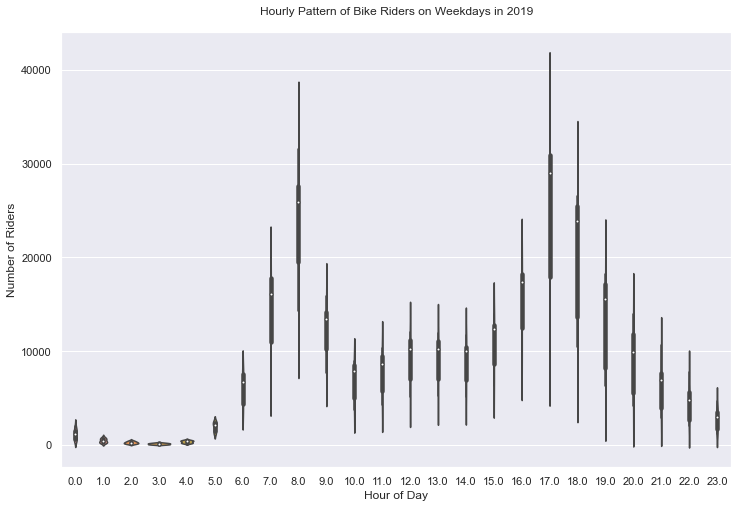

In [168]:
# Import Matplotlib and Seaborn modules for plotting

import matplotlib.pyplot as plt
import seaborn as sbn

# Extract weekday data from the df_hrs dataframe obtained in Section IV.1.1 

data_weekday = df_hrs.loc[df_hrs['Day'] == 'weekday']

# Display of a violin plot for the number of users (y-axis) versus hour of day (x-axis)

fig, ax_sbn = plt.subplots(figsize=(12,8))
sbn.violinplot(x='Hour', y='Num_Users', data=data_weekday, ax = ax_sbn)

ax_sbn.set(xlabel='Hour of Day', ylabel='Number of Riders', \
           title='Hourly Pattern of Bike Riders on Weekdays in 2019\n')
ax_sbn.yaxis.grid(True)
plt.show()

### Discussion 3:

From the Seaborn plot, there is a strong pattern: the peak hour in the morning occurs at 8 am;the peak hour in the afternoon occurs at 5 p.m. Since, the acitivities are associated with weekdays, this pattern matches our intuition of peak rush hours in the morning and afternoon. 

Also, from the plot, we conclude that most activities took place between 7:00-9:00 am in the morning and 3:00-7:00 p.m. in the afternoon. Furthermore, the hours during which bike rental is dormant are between 1 a.m. and 4 a.m. on weekdays.

Overall, the plot has a bimodal shape.

### IV.1.3 Exploratory Data Analysis: Visualization of Hourly Usage Patterns on Weekends

From the dataframe obtained in Section IV.1.2, we will extract the sub-dataframe that contains the weekend information. Next, we use the Seaborn module to display the plot of the total number of users (on the y-xxis) versus each hour of the day (on the x-axis) for 2019.


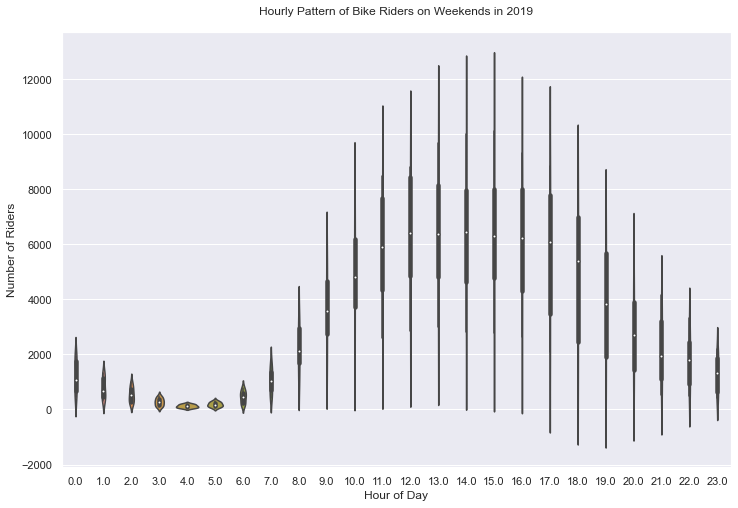

In [169]:
# Extract weekdend data from the df_hrs dataframe obtained in Section IV.1.1 

data_weekend = df_hrs.loc[df_hrs['Day'] == 'weekend']

# Display of a violin plot for the number of users (y-axis) versus hour of day (x-axis)

fig, ax_sbn = plt.subplots(figsize=(12,8))
sbn.violinplot(x='Hour', y='Num_Users', data=data_weekend, ax = ax_sbn)

ax_sbn.set(xlabel='Hour of Day', ylabel='Number of Riders', \
           title='Hourly Pattern of Bike Riders on Weekends in 2019\n')
ax_sbn.yaxis.grid(True)
plt.show()

### Discussion 4:

The hourly usage patterns on weekends differ from those on weekdays. First, the peak hours occur between 11:00 am and 5 p.m. Second, the dormant hours are between 3:00-5:00 am. Third, there is no single hour peak. Rather, the peak hours are spread out evenly between 11:00 am and 5 p.m. Fourth, the number of riders is mostly below 8,000, unlike on weekdays when the number of riders exceeds 25,000. Fifth, the overall shape of the curve is almost unimodal with large spread around the peak hours.

### IV.1.4 Data Analysis: Regression of Hourly Usage Pattern on Weekdays via Support Vector Machine

From the exploratory data analysis step taken above, we want to find a optimal quantitative statistical model that can best fit the data points. This procedure is called regression. The outcome of regression is a predictive model that can be used to predict, in this case, the number of users at a certain time of the day on a weekday.

We decided to go with Support Vector Regression (SVR) because of the fact that the bimodal shape of the plot observed in Section IV.1.2 cannot be fitted by a linear function. In addition, we decided to select Radial Basis Function for SVR due to its simplicity, i.e., without too many hyperparameters.

Before regression can be carried out, it is important to rescale and transform the dataset. This pre-processing step for machine learning can be accomplished with the help of the StandardScaler function in the Sklearn module. That is, the original dataset is transformed into a new vector space from which SVR can be performed. To obtain the information corresponding to the original feature space, the inverse transform is applied to the vectors in the transformed space.

In [170]:
# Import machine-learning modules

from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler  
import warnings
warnings.filterwarnings('ignore')

# Reshape the weekday data for Support Vector Regression (SVR)

X = data_weekday.Hour.values.reshape(-1, 1)
y = data_weekday.Num_Users.values.reshape(-1, 1)

# Scale the original feature vectors and transform them into a new space for SVR 

sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y)

# Radial Basis Function (RBF) is chosen for SVR. This requires the selection of an appropriate
# gamma in the RBF. To determine the optimal gamma, we will loop over the regression and 
# find the one with the highest R^2 score.

scores = []
for g in range(1,100):
    regressor = SVR(kernel = 'rbf', gamma=g) 
    regressor.fit(X, y)
    score = r2_score(sc_y.inverse_transform(regressor.predict(X)), sc_y.inverse_transform(y))
    scores.append(score)

# Determine the maximum score and its corresponding hyperparameter gamma.
    
max_score = max(scores)
gamma_best = scores.index(max_score)
print('The best score is:', max_score, ', when gamma equals', gamma_best)

# Fit the data with the optimal SVR.

regressor = SVR(kernel = 'rbf', gamma=gamma_best) 
regressor.fit(X, y)


The best score is: 0.8072632882272904 , when gamma equals 54


SVR(gamma=54)

### Discussion 5:

The only hyperparameter involved in the Radial Basis Function is gamma. Please refer to pp. 352-354 of [3] for more information about the Radial Basis kernel in Support Vector Machine. Note that the gamma used in this tutorial is actually the reciprocal of the gamma used in this textbook. 

As we sweep gamma over the interval [1, 100], the gamma that yields the optimal R^2 score is around 54. See the definition of the R^2 score statistics on page 70 of [3]. The best R^2 score is approximately 0.8. Using this value of gamma, we fit the dataset with the corresponding RBF-based Support Vector Regression.

The result of SVR can be visualized in the below plot.

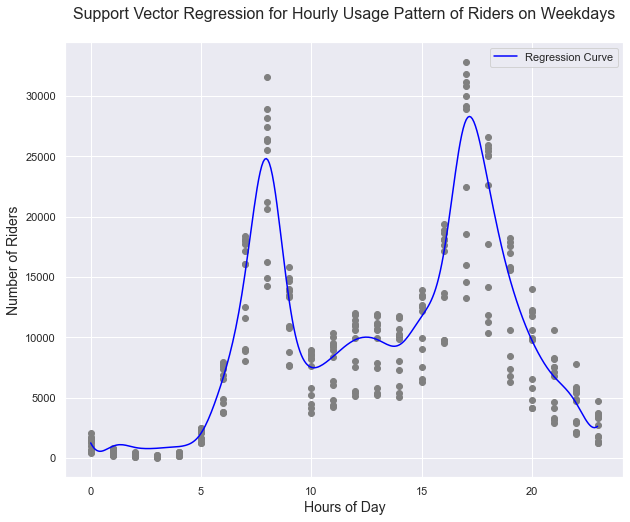

In [171]:
# Set up the plot of Support Vector Regression for hourly usage pattern on weekdays.

fig, ax = plt.subplots(figsize=(10,8))

X_grid = np.arange(min(X), max(X), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))

# Note: to diplay the regression in the original feature space, the inverse transform
# must be applied to the regressed vectors.

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'gray')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), \
         color = 'blue', label='Regression Curve')
ax.set_title('Support Vector Regression for Hourly Usage Pattern of Riders on Weekdays\n', fontsize=16)
ax.set_xlabel('Hours of Day', fontsize=14)
ax.set_ylabel('Number of Riders', fontsize=14)
ax.legend()

plt.show()

### Discussion 6:

The SVR curve fits the scattered points quite well. The bimodal distribution of the curve is captured by the regression model.

One can subsequently use this SVR regression model for prediction. For example, using the predict function in the sklearn module, one can compute an estimated number of riders for any given time during the day. This is a useful way to extrapolate results that are not available in a given dataset. Later, we will see that this predictive capability also has a limitation.

### IV.1.5 Data Analysis: Regression of Hourly Usage Pattern on Weekends via Support Vector Machine

We will mimic Section IV.1.4 to construct a Support Vector Regression (SVR) for the weekend data. Again, we will select the Radial Basis kernel for SVR and an optimal parameter for the hyperparameter gamma in the Radial Basis Function. 

With the exception of the weekend data, the remaining steps are identical to those in Section IV.1.4.

In [172]:
# Reshape the weekend data for Support Vector Regression (SVR)

X = data_weekend.Hour.values.reshape(-1, 1)
y = data_weekend.Num_Users.values.reshape(-1, 1)

# Scale the original feature vectors and transform them into a new space for SVR 

sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y)

# Radial Basis Function (RBF) is chosen for SVR. This requires the selection of an appropriate
# gamma in the RBF. To determine the optimal gamma, we will loop over the regression and 
# find the one with the highest R^2 score.

scores = []
for g in range(1,100):
    regressor = SVR(kernel = 'rbf', gamma=g) 
    regressor.fit(X, y)
    score = r2_score(sc_y.inverse_transform(regressor.predict(X)), sc_y.inverse_transform(y))
    scores.append(score)

# Determine the maximum score and its corresponding hyperparameter gamma.
    
max_score = max(scores)
gamma_best = scores.index(max_score)
print('The best score is:', max_score, ', when gamma equals', gamma_best)

# Fit the data with the optimal SVR.

regressor = SVR(kernel = 'rbf', gamma=gamma_best) 
regressor.fit(X, y)

The best score is: 0.6071072696112115 , when gamma equals 2


SVR(gamma=2)

### Discussion 7:

Now the best score is only about 0.61. The gamma yielding this score is approximately 2.

We will plot the regression cureve below and visually assess the model's accuracy.

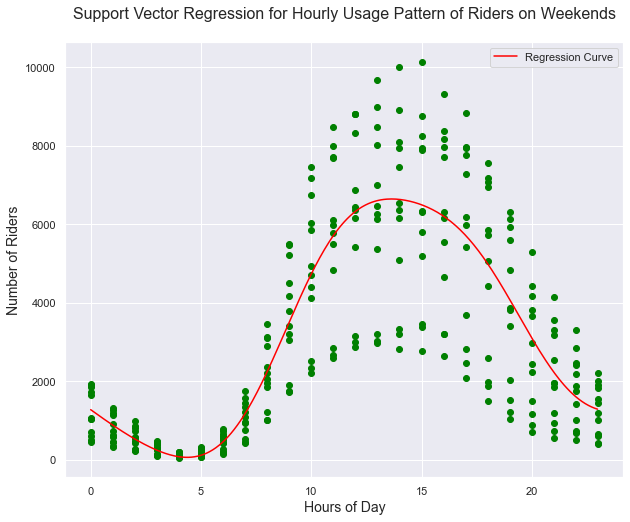

In [173]:
fig, ax = plt.subplots(figsize=(10,8))

X_grid = np.arange(min(X), max(X), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))

# Use inverse transform to map back to the original feature space so that
# the data points are scaled properly to the original scales.

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'green')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), \
         color = 'red', label='Regression Curve')

# Label the axes

ax.set_title('Support Vector Regression for Hourly Usage Pattern of Riders on Weekends\n', fontsize=16)
ax.set_xlabel('Hours of Day', fontsize=14)
ax.set_ylabel('Number of Riders', fontsize=14)
ax.legend()

plt.show()

### Discussion 8:

Even though the regression curve does not fit the data points for the weekend data as well as that for the weekday data, this is essentially the best we can do since the data points are quite spread out. This anomaly can easily be explained. During weekends, people don't wake up and ride bike at any particular time, especially between 10 am and 5 pm. Hence, the data points are scattered in this time period. Again, we observe that the peak number of riders is around 6,500.

## IV.2 Data Analysis: Daily Usage Patterns

Now, we will leverage the daily weather dataset to explore potential patterns of bike usage in 2019. From the bike sharing dataset, we will only keep the following information: date, membership type, the number of users for each membership type, the total duration of each rental period (in hours).

The weather dataset for Washington D.C. consists of historical daily weather information. From this dataset, we will extract only the daily information for 2019. This extracted weather information will then be merged with the bike sharing datasets for analysis of daily usage patterns.

### IV.2.1 Tidying Data

We will first read in the bike sharing dataset and tidy the data in order to construct a dataframe consisting of four columns of information: date, membership type (Member_type), the number of users for each membership type (#Member_type), and the total duration of each bike rental transaction (Total_duration).

As above, we bring in the dataset for each month, pre-process it to tidy up data, and append the results to the previously processed data. The resulting dataframe, called df_bike, consists of relevant information for 365 days.

In [9]:
# Initialize the empty dataframe called df_bike.

data = {'Date':[], 'Member_type':[], '#_Member_type':[], 'Total_duration':[]}
df_bike = pd.DataFrame(data)

# For each month, the loop below iterate over the montly dataset, count the the number of 
# users for each membership type amd sum up the hours of rental for each membership type.

for i in range(1,13):
    if i < 10:
        month = '0'+str(i)
    else:
        month = str(i)    
    filename = '2019'+month+'-capitalbikeshare-tripdata.csv'
    filepath = r'C:\Users\etale\CMSC 320 - Jupyter Notebooks\Final Tutorial\%s'%filename

# Extract the date information

    df_temp = pd.read_csv(filepath)
    df_temp['Date'] = pd.to_datetime(df_temp['Start date']).dt.date

    df_temp = df_temp[['Date', 'Duration', 'Member type']]
    df_temp.rename(columns={'Member type':'Member_type'}, inplace=True)
    
# For each date and membership type, tally the number of biker riders and the rental duration
# in terms of seconds. The results are stored in the dataframe called df_bike.

    df1 = df_temp.groupby(['Date', 'Member_type'])['Member_type'].count().reset_index(name = '#_Member_type')
    df2 = df_temp.groupby(['Date', 'Member_type'])['Duration'].sum().reset_index(name = 'Total_duration')
    df3 = pd.merge(df1, df2, on = ['Date', 'Member_type'], how = "inner")
    
    df_bike = pd.concat([df_bike, df3], ignore_index=True)

df_bike

,Date,Member_type,#_Member_type,Total_duration
0,2019-01-01,Casual,1083.0,3296047.0
1,2019-01-01,Member,3457.0,3547830.0
2,2019-01-02,Casual,660.0,1643993.0
3,2019-01-02,Member,5907.0,4359620.0
4,2019-01-03,Casual,938.0,2176528.0
...,...,...,...,...
725,2019-12-29,Member,1198.0,847064.0
726,2019-12-30,Casual,724.0,1403961.0
727,2019-12-30,Member,4695.0,3713818.0
728,2019-12-31,Casual,650.0,1595133.0


### IV.2.2 More Tidying Data

In this section, we will consolidate data from both membership types, casual and member. This pre-processing step is done in preparation for merging with the weather dataset later on. In addition, the rental duration is converted from seconds to hours. The dataframe is displayed.

In [10]:
df4 = df_bike.drop('Member_type', axis=1)
df5 = df4.groupby(['Date'])['#_Member_type'].sum().reset_index()
df6 = df4.groupby(['Date'])['Total_duration'].sum().reset_index()

df7 = pd.merge(df5, df6, on='Date', how='inner')
df7.rename(columns={'#_Member_type':'total_users', 'Total_duration':'total_hrs'}, inplace=True)
df7['total_hrs'] = df7['total_hrs']/3600
df7

,Date,total_users,total_hrs
0,2019-01-01,4540.0,1901.076944
1,2019-01-02,6567.0,1667.670278
2,2019-01-03,7604.0,1959.886667
3,2019-01-04,7362.0,1949.938333
4,2019-01-05,5106.0,1397.784167
...,...,...,...
360,2019-12-27,4916.0,1572.637500
361,2019-12-28,6282.0,2588.046389
362,2019-12-29,1409.0,329.521389
363,2019-12-30,5419.0,1421.605278


### IV.2.3 Daily Weather Dataset

We read in the historical daily weather dataset for Washington D.C. from a Carnegie Mellon University website. In fact, the historical daily weather dataset for various cities in the U.S. can be obtained from this website:   https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488. To get the data for Washington D.C., one has to identify the correct dataset from this file (city_info.csv): https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488?file=25951886. 



In [11]:
df_weather = pd.read_csv(r'https://kilthub.cmu.edu/ndownloader/files/25951385')
df_weather

,Unnamed: 0,Date,tmax,tmin,prcp
0,1,1871-01-01,NaN,NaN,0.0
1,2,1871-01-02,NaN,NaN,0.0
2,3,1871-01-03,NaN,NaN,0.0
3,4,1871-01-04,NaN,NaN,0.0
4,5,1871-01-05,NaN,NaN,0.0
...,...,...,...,...,...
54782,54783,2020-12-27,43.0,26.1,0.0
54783,54784,2020-12-28,52.0,35.1,0.0
54784,54785,2020-12-29,43.0,32.0,0.0
54785,54786,2020-12-30,46.0,30.9,0.0


### Discussion 9:

Even though the historical daily weather dataset contains NaN entries, the data is clean for the year 2019. We also cross-checked this dataset with other datasets, e.g., https://www.timeanddate.com/weather/usa/washington-dc/historic?month=12&year=2019, to make sure that the information therein is correct.

Since we are interested in the daily weather in 2019, we will extract this information from the entire historical daily weather dataset. The dataset has the following information: date, daily maximum temperature (tmax), daily minimum temperature (tmin), precipitation (prcp). We will retain all these columns for data analysis.

In [12]:
# Extract the weather information for the year 2019 from the historical daily weather 
# dataset. Keep the date, maximum and minimum temperature, and precipitation level.

df_weather = df_weather.loc[('2019-01-01'<= df_weather['Date'])  \
                         & (df_weather['Date'] <= '2019-12-31')]
df_weather = df_weather[['Date','tmax','tmin','prcp']]
df_weather.info()
print()
df_weather

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 54056 to 54420
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    365 non-null    object 
 1   tmax    365 non-null    float64
 2   tmin    365 non-null    float64
 3   prcp    365 non-null    float64
dtypes: float64(3), object(1)
memory usage: 14.3+ KB



,Date,tmax,tmin,prcp
54056,2019-01-01,64.0,44.1,0.00
54057,2019-01-02,48.0,42.1,0.00
54058,2019-01-03,51.1,39.9,0.00
54059,2019-01-04,50.0,36.0,0.04
54060,2019-01-05,54.0,46.0,0.04
...,...,...,...,...
54416,2019-12-27,55.9,37.9,0.00
54417,2019-12-28,66.9,37.9,0.00
54418,2019-12-29,53.1,44.1,0.60
54419,2019-12-30,66.0,45.0,0.26


In [14]:
# Convert the Date column into the datetime object format so that this dataframe
# can be joined with the bike sharing dataframe later on. The output dataframe, df_weather,
# contains the relevant information for each day in 2019.

df_weather['date'] = pd.to_datetime(df_weather['Date']).dt.date
df_weather.drop('Date', axis=1, inplace=True)
df_weather.rename(columns={'date':'Date'}, inplace=True)
df_weather = df_weather[['Date','tmax','tmin','prcp']]

df_weather

,Date,tmax,tmin,prcp
54056,2019-01-01,64.0,44.1,0.00
54057,2019-01-02,48.0,42.1,0.00
54058,2019-01-03,51.1,39.9,0.00
54059,2019-01-04,50.0,36.0,0.04
54060,2019-01-05,54.0,46.0,0.04
...,...,...,...,...
54416,2019-12-27,55.9,37.9,0.00
54417,2019-12-28,66.9,37.9,0.00
54418,2019-12-29,53.1,44.1,0.60
54419,2019-12-30,66.0,45.0,0.26


### IV.2.4 Merging Daily Bike Sharing and Daily Weather Datasets

Now, we take the inner join of the df_weather dataframe created above and the df7 dataframe created in Section IV.1.2. The inner joint is based on the Date column, which is the same in both dataframes. Note that, this is where a conversion to the same datatime format is essential before taking the inner join.


In [15]:
df8 = pd.merge(df7, df_weather, on='Date', how='inner')


### IV.2.5 Visualization of Daily Temperatures and Daily Total Rental Duration

The joined dataframe, df8, obtained above is plotted to show how the daily maximum and minimum temperatures and the total rental durations vary over days of the year. In the plot, we use two y-axes. The left one represents the temperature scale; the right represents the total rental hours.

The blue curve represents the daily maximum temperature. The orange curve represents the daily minimum temperature. The green curve represents the total rental durations each day.

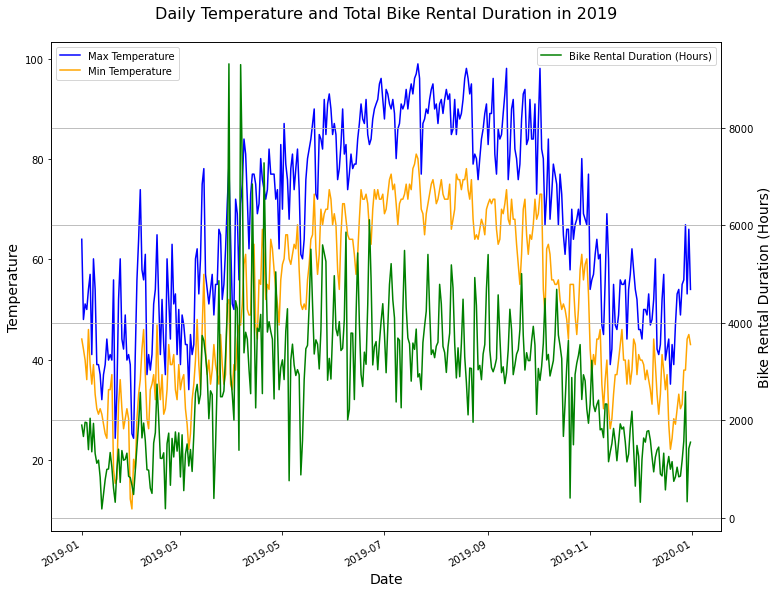

In [73]:
# Import necessary library modules

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

fig,ax = plt.subplots(figsize=(12,10))
ax.plot(df8.Date, df8.tmax, color='blue', label='Max Temperature')
ax.plot(df8.Date, df8.tmin, color='orange', label='Min Temperature')

# Set the tickmarks for the datetime object on the x-axis

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Temperature',fontsize=14)
ax.set_title('Daily Temperature and Total Bike Rental Duration in 2019\n',fontsize=16)
ax.legend()
ax.legend(loc='upper left')

# Create the second y-axis, i.e., the vertical axis on the right.

ax2=ax.twinx()
ax2.plot(df8.Date, df8.total_hrs, color='green', label='Bike Rental Duration (Hours)')
ax2.set_ylabel('Bike Rental Duration (Hours)',fontsize=14)
ax2.legend()
ax2.legend(loc='upper right')
ax2.grid()

plt.gcf().autofmt_xdate()

plt.show()

### Discussion 10:

From the above plot, we can detect two patterns. First, all three curves tend to rise between Spring and Fall of 2019. They tend to dip down during the winter months, January-February and November-December.

Second, there are two unexpected peaks for the green curve. These peaks show that the total rental durations exceed 8,000 hours on two days in March and/or April. To determine the exact dates for these two events, which are deemed outliers, we use the code below.

This preliminary visualization shows a qualitative relation between daily temperature and bike rental hours. We will probe this relationship later by means of Random Forest regression.

In [65]:
# Determine the two observations, which are deemed anomalous, with 
# the total hours exceeding 8,000

outliers = df8.loc[df8['total_hrs'] > 8000]
outliers

,Date,total_users,total_hrs,tmax,tmin,prcp,Month
88,2019-03-30,17911.0,9306.842778,79.0,52.0,0.0,3
95,2019-04-06,18346.0,9290.781389,71.1,46.9,0.0,4


In [66]:
# Convert the two dates found above into the days of the week.

dates = pd.to_datetime(outliers['Date']).dt.weekday
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for i in range(len(outliers)):
    print("The day on", outliers.Date.values[i], "is",days[dates.values[i]])

The day on 2019-03-30 is Saturday
The day on 2019-04-06 is Saturday


### Discussion 11:

From the above outputs, it turns out that the anomalies occurred on two Saturdays, March 30th and April 6th. These two days seem to coincide with the Cherry Blossom events in Washington D.C. In addition, the daily weather data also supports this conjecture with cool temperatures and no precipitation. Hence, from the two combined datasets, we can reasonably explain the anomaly in the bike sharing dataset.

### IV.2.6 Visualization of Daily Precipitation and Daily Total Rental Duration

Next, we examine any potential relationship between the daily precipitation and bike usage. Once again, we will plot the precipiation level on the left y-axis and the total rental duration on the right y-axis. 

The precipitation curve is colored in magenta. The rental duration is colored in green.

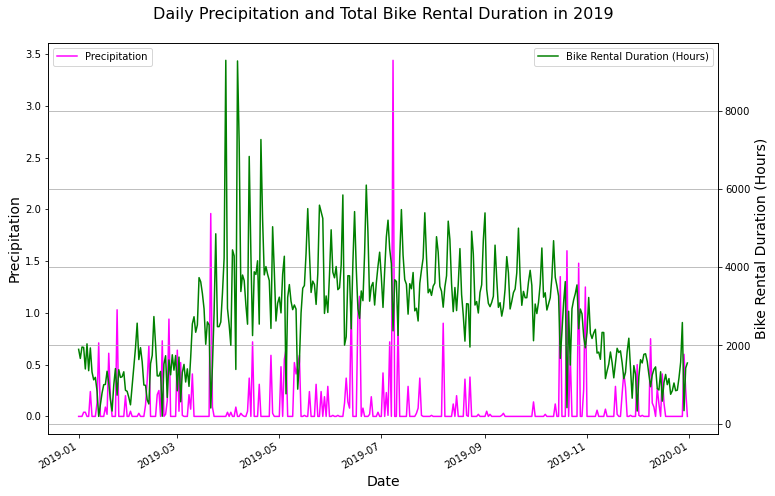

In [72]:
fig,ax = plt.subplots(figsize=(12,8))

ax.plot(df8.Date, df8.prcp, color='magenta', label='Precipitation')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Precipitation',fontsize=14)
ax.set_title('Daily Precipitation and Total Bike Rental Duration in 2019\n',fontsize=16)
ax.legend(loc='upper left')

ax2=ax.twinx()
ax2.plot(df8.Date, df8.total_hrs, color='green', label='Bike Rental Duration (Hours)')
ax2.set_ylabel('Bike Rental Duration (Hours)',fontsize=14)
ax2.legend()
ax2.legend(loc='upper right')
ax2.grid()

plt.gcf().autofmt_xdate()

plt.show()

### Discussion 12:

There seems litte correlation between the precipitation level and the rental duration over time in 2019. Once again, we observed the two Cherry-Blossom weekends in March and April durin which there was essentially no precipitation.

On the other hand, the graph shows three days in 2019 with the precipitation amount exceeds 1.5 in. In fact, the code below reveals the three dates in 2019 with rainfall exceeding 1.5 in.

In [68]:
df8.loc[df8['prcp'] > 1.5]

,Date,total_users,total_hrs,tmax,tmin,prcp,Month
79,2019-03-21,2053.0,397.625000,48.9,43.0,1.96,3
188,2019-07-08,8418.0,2374.492222,80.1,71.1,3.44,7
292,2019-10-20,1535.0,405.691389,57.9,55.0,1.60,10


## IV.3 Data Analysis: Monthly Usage Patterns

In Section IV.1, we analyzed data for hourly bike usage patterns. In Section IV.2, we analyzed data for daily bike usage patterns. Now, we will analyze the weather-bike sharing data for potential patterns at the monthly scale.

To do this, we will use the dataframe constructed by taking the inner joint of the weather and bike sharing datasets. This dataframe, df8, was obtained in Section IV.1.4. From this dataframe, we will group the data by month and find the median maximum and minimum temperatures as well as the median of the total rental durations over each month.

These three pieces of information are plotted below using two y-axes.

In [69]:
# Group dataframe df8 by month and take the median for each column.

df8['Month'] = pd.to_datetime(df8['Date']).dt.month
df9 = df8.groupby('Month').median().reset_index()
df9

,Month,total_users,total_hrs,tmax,tmin,prcp
0,1,4942.0,1181.336667,41.00,30.20,0.0
1,2,6120.5,1499.392778,51.55,34.55,0.0
2,3,8019.0,2524.604167,55.00,37.00,0.0
3,4,11975.0,3814.486111,73.90,53.00,0.0
4,5,11488.0,3358.499444,81.00,62.10,0.0
5,6,12235.5,3759.400556,84.90,68.55,0.0
6,7,12131.0,3684.908889,91.00,73.00,0.0
7,8,11866.0,3499.596389,90.00,72.00,0.0
8,9,11979.0,3370.292778,84.45,68.00,0.0
9,10,11655.0,3101.452222,70.00,55.00,0.0


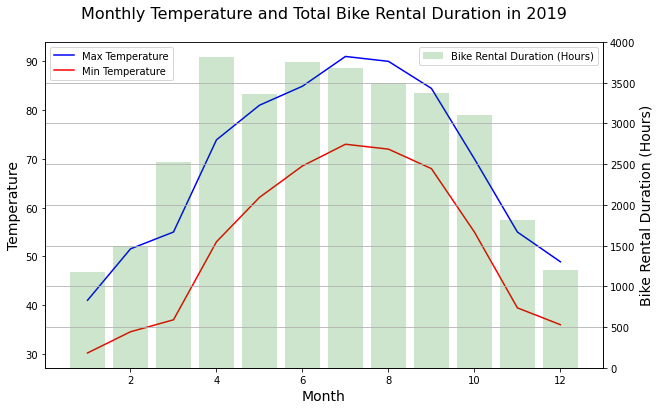

In [74]:
# Set up a plot for the above dataframe using twin y-axis.

fig,ax = plt.subplots(figsize=(10,6))

# The median maximum temperature curve is in blue. The median minimum temperature is in red. 
# The medians were taken over each month of 2019. The left y-axis denotes the temperature scale.

ax.plot(df9.Month, df9.tmax, '-b', label='Max Temperature')
ax.plot(df9.Month, df9.tmin, '-r', label='Min Temperature')
ax.legend(loc='upper left')

# Label the plot

ax.set_xlabel('Month',fontsize=14)
ax.set_ylabel('Temperature',fontsize=14)
ax.set_title('Monthly Temperature and Total Bike Rental Duration in 2019\n',fontsize=16)

# Set up the right y-axis, which denotes the total rental durations. for each month,
# the median rental hour is represented by a bar in green.

ax2=ax.twinx()
ax2.bar(df9.Month, df9.total_hrs, alpha=0.2, color='green', label='Bike Rental Duration (Hours)')
ax2.set_ylabel('Bike Rental Duration (Hours)',fontsize=14)
ax2.grid()
ax2.legend(loc='upper right')

plt.show()

### Discussion 13:

From the two curves and the bar plot, we can qualitatively assert that there is a relationship between the median temperatures and the median rental durations. The only quesion is "how strong is this correlation?" The answer to this question will be examined in the sequel of this tutorial.

## IV.4 Data Analysis: Probing the Correlation Between Bike Usage Patterns and Weather Using Random Forest Regression for Casual Riders

We will study the correlation between the total rental durations and the features in the weather dataset. First, we need to construct a dataframe that contains the relevant information from both datasets.

### IV.4.1 Tidying Data: Taking Inner Join

We first form the inner join of the df_bike dataframe (see Section IV.1.1) and the df_weather dataframe (see Section IV.1.3). The durations are converted from seconds to hours.

In [75]:
# Taking the inner join of the df_bike and df_weather dataframes

df = pd.merge(df_bike, df_weather, on='Date', how='inner')
df.info()
print()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            730 non-null    object 
 1   Member_type     730 non-null    object 
 2   #_Member_type   730 non-null    float64
 3   Total_duration  730 non-null    float64
 4   tmax            730 non-null    float64
 5   tmin            730 non-null    float64
 6   prcp            730 non-null    float64
dtypes: float64(5), object(2)
memory usage: 45.6+ KB



,Date,Member_type,#_Member_type,Total_duration,tmax,tmin,prcp
0,2019-01-01,Casual,1083.0,3296047.0,64.0,44.1,0.00
1,2019-01-01,Member,3457.0,3547830.0,64.0,44.1,0.00
2,2019-01-02,Casual,660.0,1643993.0,48.0,42.1,0.00
3,2019-01-02,Member,5907.0,4359620.0,48.0,42.1,0.00
4,2019-01-03,Casual,938.0,2176528.0,51.1,39.9,0.00
...,...,...,...,...,...,...,...
725,2019-12-29,Member,1198.0,847064.0,53.1,44.1,0.60
726,2019-12-30,Casual,724.0,1403961.0,66.0,45.0,0.26
727,2019-12-30,Member,4695.0,3713818.0,66.0,45.0,0.26
728,2019-12-31,Casual,650.0,1595133.0,54.0,43.0,0.00


In [76]:
# Converting the time durations from seconds to hours

df['duration_hrs'] = (df['Total_duration'])/3600

df

,Date,Member_type,#_Member_type,Total_duration,tmax,tmin,prcp,duration_hrs
0,2019-01-01,Casual,1083.0,3296047.0,64.0,44.1,0.00,915.568611
1,2019-01-01,Member,3457.0,3547830.0,64.0,44.1,0.00,985.508333
2,2019-01-02,Casual,660.0,1643993.0,48.0,42.1,0.00,456.664722
3,2019-01-02,Member,5907.0,4359620.0,48.0,42.1,0.00,1211.005556
4,2019-01-03,Casual,938.0,2176528.0,51.1,39.9,0.00,604.591111
...,...,...,...,...,...,...,...,...
725,2019-12-29,Member,1198.0,847064.0,53.1,44.1,0.60,235.295556
726,2019-12-30,Casual,724.0,1403961.0,66.0,45.0,0.26,389.989167
727,2019-12-30,Member,4695.0,3713818.0,66.0,45.0,0.26,1031.616111
728,2019-12-31,Casual,650.0,1595133.0,54.0,43.0,0.00,443.092500


### IV.4.2 Tidying Data: Split Dataframe

After taking an inner join, we split the dataframe df into two sub-dataframes based on the two membership types, one for the casual bike riders and the other for riders who have membership with the Capital Bike Share program.

These two sub-dataframes comprise the rental durations, maximum and minimum temperatures, precipitation level, and the total number of users for each membership type.

In [77]:
# Split the df dataframe into two sub-dataframes: one sub-dataframe for casual riders and 
# the other for members of the Captial Bike Share program.

df_casual = df.loc[df['Member_type'] == 'Casual']
df_member = df.loc[df['Member_type'] == 'Member']

# Retain only the relevant features to be used later for regression.

df_member = df_member[['Date','#_Member_type','tmax','tmin','prcp','duration_hrs']]
df_casual = df_casual[['Date','#_Member_type','tmax','tmin','prcp','duration_hrs']]
df_casual


,Date,#_Member_type,tmax,tmin,prcp,duration_hrs
0,2019-01-01,1083.0,64.0,44.1,0.00,915.568611
2,2019-01-02,660.0,48.0,42.1,0.00,456.664722
4,2019-01-03,938.0,51.1,39.9,0.00,604.591111
6,2019-01-04,848.0,50.0,36.0,0.04,498.446389
8,2019-01-05,701.0,54.0,46.0,0.04,433.385833
...,...,...,...,...,...,...
720,2019-12-27,939.0,55.9,37.9,0.00,623.803611
722,2019-12-28,1732.0,66.9,37.9,0.00,1175.465278
724,2019-12-29,211.0,53.1,44.1,0.60,94.225833
726,2019-12-30,724.0,66.0,45.0,0.26,389.989167


### IV.4.3 Pre-process Data for Forest Random Regression

In this section, we will pre-process the sub-dataframe consisting information for casual bike riders. This sub-dataframe will be used in the next section for probing possible correlations between the features/predictors which are the columns of this sub-dataframe. 

In particular, we will use the rental durations as the dependent y-variable. The feature/predictor variable comprise the number of casual bike riders, the maximum and minimum temperatures, and the precipitation level.

The pre-processing step includes the splitting of this sub-dataframe into training and testing subsets. It also includes scaling and transforming the original dataset. The latter is important in this case because the duration hours are much larger than the precipitation level. Hence, without appopriate scaling of the data, a regression result could be misinterpreted.

In [78]:
# Split the df_casual dataframe into dependent and independent variables. The dependent
# y-variable is the total durations in hours. The independent X-variables comprise:
# the number of casual riders, the max and min temperatures, and the precipitation level
# measured in inches.

y_casual = df_casual.duration_hrs.values
X_casual = df_casual.drop(['duration_hrs','Date'], axis=1).values
df_X_casual = df_casual.drop(['duration_hrs','Date'], axis=1)
df_X_casual

,#_Member_type,tmax,tmin,prcp
0,1083.0,64.0,44.1,0.00
2,660.0,48.0,42.1,0.00
4,938.0,51.1,39.9,0.00
6,848.0,50.0,36.0,0.04
8,701.0,54.0,46.0,0.04
...,...,...,...,...
720,939.0,55.9,37.9,0.00
722,1732.0,66.9,37.9,0.00
724,211.0,53.1,44.1,0.60
726,724.0,66.0,45.0,0.26


In [79]:
# Import necessary Python modules for scaling the dataset and training a generic regressor

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler  

# The original dataset for casual bike riders is split into two parts with 1/4 of this
# dataset will be used for testing the regressor. Before splitting, the data is randomly
# shuffled and, then, randomly split into 1/4 and 3/4 portions.

X_casual_train, X_casual_test, y_casual_train, y_casual_test = \
          train_test_split(X_casual, y_casual, test_size=0.25, random_state=11, shuffle=True)

print("Shape of X_casual_train:", X_casual_train.shape)
print("Shape of X_casual_test:", X_casual_test.shape)
print("Shape of y_casual_train:", y_casual_train.shape)
print("Shape of y_casual_test:", y_casual_test.shape)

# Apply the scaling and transform functions in sklearn to the original dataset.

SS = StandardScaler()    
X_casual_train= SS.fit_transform(X_casual_train)    
X_casual_test = SS.transform(X_casual_test)    



Shape of X_casual_train: (273, 4)
Shape of X_casual_test: (92, 4)
Shape of y_casual_train: (273,)
Shape of y_casual_test: (92,)


### IV.4.4 Finding an Optimal Random Forest Regressor

To assess any correlations between the total rental duration and other features in the dataset of casual bike riders, we will use a Random Forest Regression method. Although the Decision Tree Regression approach would yield a tree that can be easily interpretable using Python's graphviz module, the decisiont tree obtained will likely have a high variance, especially when the dataset is not that large. More information on Random Forests and Decision Tress can be found in Chapter 8 of [3].  

An optimal Random Forest regressor is found by a combination of tuning the hyperparameters involved in this method and using the k-fold cross validation technique. In this tutorial, we will be using 10-fold cross validation to determine an optimal set of hperparameters. For information on k-fold cross validation, refer to Section 5.1.3 in [3]. To understand how k-fold cross-validation intertwines with regression/classification, see [2]. 

The hyperparameters comprise: the tree depths (from 3 to 7 layers), the number of trees (ranging from 5 to 100 with a mulitple of 5), and the number of minimum samples required to be at a leaf node. For further information on these hyperparameters, please refer to [4]. The 10-fold cross-validation will determine an optimal set of hyperparameters. Here, optimality is based on the default R^2 scoring method. Once, an optimal set of hyperparameters has been determined, a Random Forest Regressor can be constructed with these hyperparameters. This regressor is then used for studying correlations between the feature/predictor variables.


In [80]:
# Import Random Forest Regressor from sklearn as well as performance metrics for 
# performance assessment

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Create a constructor for a Random Forest regressor

model = RandomForestRegressor()

# Define the hyperparameters involved in Random Forest Regression

parameters = {'max_depth':range(3,7),'n_estimators':range(5,100,5),'min_samples_leaf':range(1,10)}

# Construct a GridSearch object

GridSearch = GridSearchCV(model, param_grid=parameters, cv=10, n_jobs=-1, refit=True)

# Use the GridSearch object and the training data to determine an optimal set of hyperparameters

results_fit = GridSearch.fit(X_casual_train, y_casual_train)
best_params = results_fit.best_params_

print("The best hyperparameters:", best_params)

# Use the set of optimal hyperparameters to construct a Random Forest Regressor

regressor_opt = RandomForestRegressor(max_depth=best_params['max_depth'], 
                                         n_estimators=best_params['n_estimators'])

regressor_opt.fit(X_casual_train, y_casual_train)

# Apply the regressor to the test data to obtain the predicted values.

predictions = regressor_opt.predict(X_casual_test)

# Display the 10 scores obtained from 10-fold cross-validation. 'cv' = 10 denotes a
# 10-fold cross validation.

scores = cross_val_score(regressor_opt, X_casual_train, y_casual_train, cv=10)


The best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 70}


### Discussion 14:

From the output, an optimal set of hyperparameters consists of 70 decision trees, each has the maximum depth of 5, and only 1 sample is required to be at each leaf node.

Note that these hyperparameters will likely change if the original dataset was randomized differently and different training/test subsets were created. 

Since the Random Forest Regression comprise 70 decision trees, it is impossible to visualize them to trace out how a prediction is made for a single observation. Below is the code for visualizing one of those 70 decision trees of the optimally selected Random Forest Regressor. The plot show the 6th decision tree, using estimators_[5], in the arguments of the dtreeviz function.

Note: There are two ways to visualize decision trees: dtreeviz and graphviz. The dtreeviz can easily be installed by piping in Jupyter Notebook. On the other hand, installing graphviz is not a trivial task. One would have to install the Graphviz package for the operating system in use. Next, a pip install of Python graphviz, pydot, and pydotplus in Jupyter Notebook is required. In addition, one has to set the enrivonment variables to include the paths for Graphviz's bin and Anaconda's scripts. A conda install may or may not work.

The viz.view() command pops up a dialogue box asking the viewer what app is used to display the svg file for the decision tree. Using a standard browser, once can view this graphic. Alternatively, this graphic can be saved to a local drive. 

In [81]:
# import the dtreeviz modules for visualizing decision trees obtained from Random Forest 
# Regression. Note that the decision tress can also be visualized by the graphviz module.
# However, the dtreeviz graphic display is more attractive.

import graphviz
import matplotlib.pyplot as plt
import pydot
import pydotplus
from sklearn import tree
from sklearn.tree import export_graphviz
from dtreeviz.trees import dtreeviz

# Construct a dtreeviz object by passing in the arguments. Here, the first argument of dtreeviz
# denotes the 6th decision tree obtained during the construction of the optimal
# Random Forest Regressor.

viz = dtreeviz(regressor_opt.estimators_[5], X_casual_train, y_casual_train, 
               feature_names=df_X_casual.columns,
               title='Decision Tree')

# The view command pops up a dialog box asking the user to select an app for display
# the graphic.

viz.view()

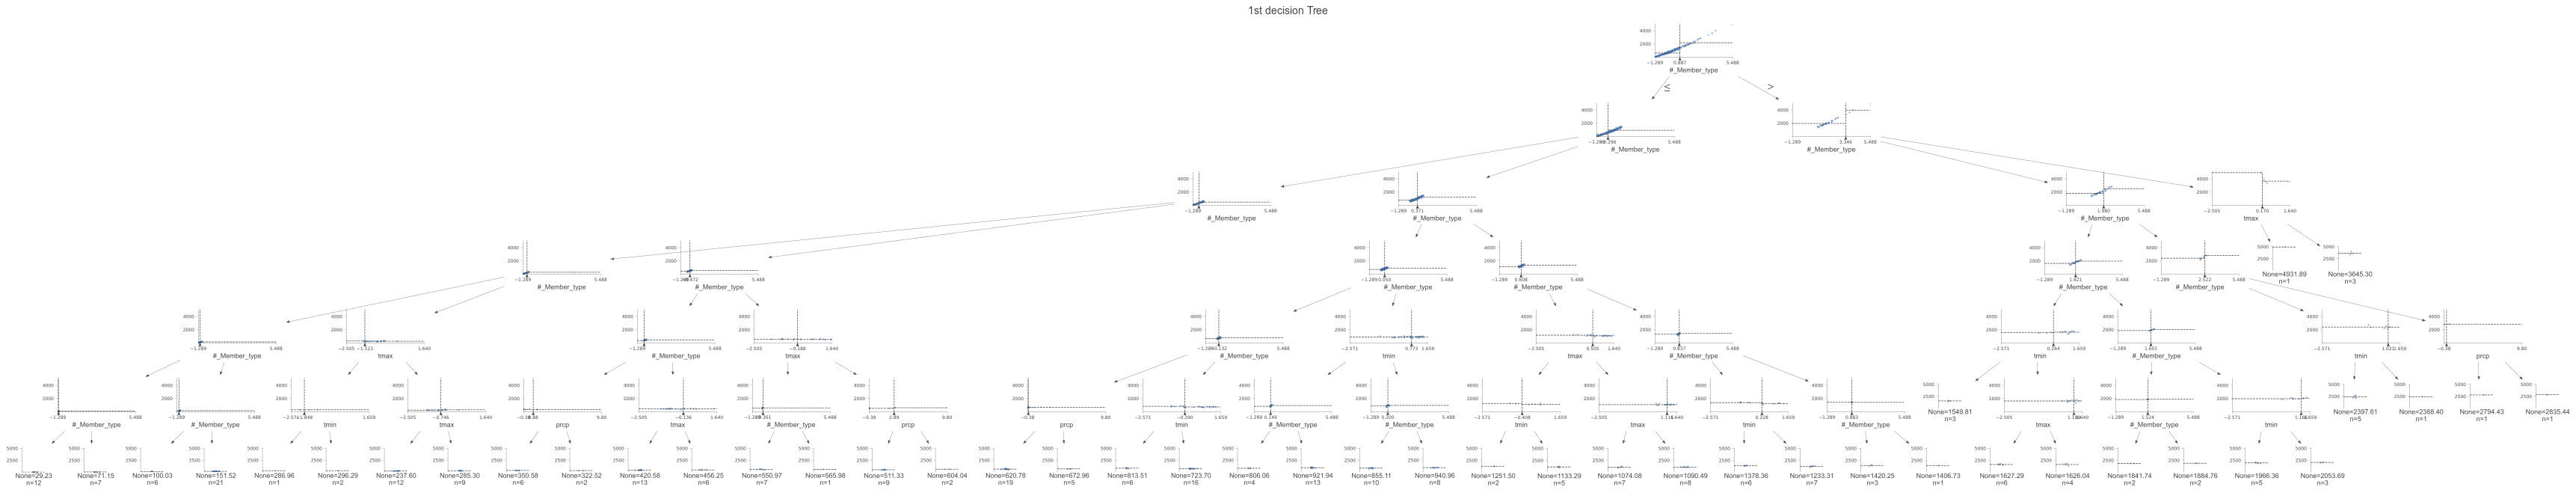

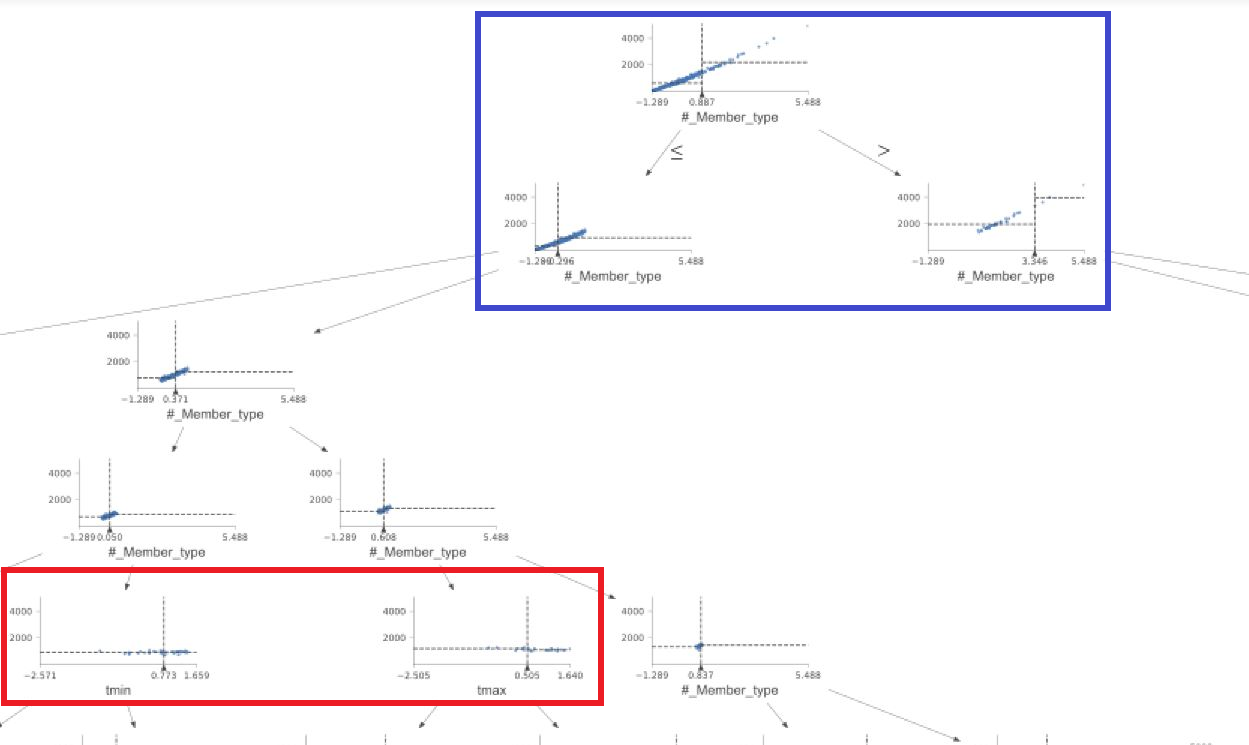

### Discussion 15:

The two images above were inserted into this tutorial to illustrate the decision tree selected for visualization. The top image shows the entire tree with 5 layers. The graphic is too small for viewing.

The bottom image is an enlargement of a section of the top image. In the blue box, one can see how the feature '#Member_type' was used to determine the branchings of the tree. Note that, this feature is dominant. In fact, the other features (tmin, tmax, and prcp) don't appear until the fifth layer of the tree. See the red box. This tells us that these three features are much less significant in the prediction of the y-variable, i.e., the total rental durations. Indeed, we will see a more qualitative comparison of these features in the next section.


### IV.4.5 Performance Assessment of Random Forest Regressor

Next, using the obtained regressor, we compare the predicted and actual values by: (1) plotting these two sets of values in a scatter plot and see how far they deviate from the line y=x; (2) using the R^2 score to assess the qualitative accuracy of the prediction. The next two blocks of code carry out both methods.

Afterwards, we will analyze the feature importance of the Random Forest Regressor.

Text(0.5, 1.0, 'Predicted vs. Actual Values for Bikeshare Casual Riders via Random Forest Regression\n')

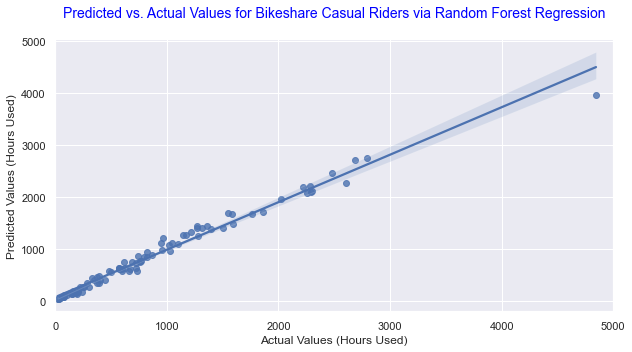

In [105]:
# Import graphic modules for plotting predicted vs. actual values

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,5)})

# Use the Seaborn module to 

ax = sns.regplot(x = y_casual_test, y = predictions)
title ='Predicted vs. Actual Values for Bikeshare Casual Riders via Random Forest Regression\n'
xlabel='Actual Values (Hours Used)'
ylabel='Predicted Values (Hours Used)'
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.set_xlim(0, 5000)
ax.set_title(title, color='Blue', fontsize=14)


In [106]:
from sklearn.metrics import r2_score
r2_score(predictions, y_casual_test )

0.9721051331182882

In [98]:
df_casual.loc[df_casual['duration_hrs'] > 4000]

,Date,#_Member_type,tmax,tmin,prcp,duration_hrs
176,2019-03-30,5784.0,79.0,52.0,0.0,4845.384444
190,2019-04-06,6121.0,71.1,46.9,0.0,4931.886389


### Discussion 16:

The R^2 score and the plot show a high correlation between the total rental durations (y-variable) and the other feature variables, which comprise the number of casual riders, the maximum and minimum temperatures, and the precipitation level. In fact, the R^2 score is around 0.97. Intuitively, there should be a correlation between the total rental durations and the number of bike riders. We will analyze this correlation in a little bit.

From the plot, we also notice an outlier that cannot be captured by the Random Forest Regressor. Since this outlier corresponds to an observation with more than 4,000 rental hours, we can quickly check that it conincides with either one of the Cherry-Blossom outliers observed earlier in Section IV.1.5.

To display the feature strength/importance, we leverage the feature_importances_ object constructed during the regression step. The block of code below sets up a graph displaying the features and prints out their values. 

[9.89510554e-01 2.51281960e-03 7.33482825e-03 6.41798127e-04]
['#_Member_type' 'tmax' 'tmin' 'prcp']


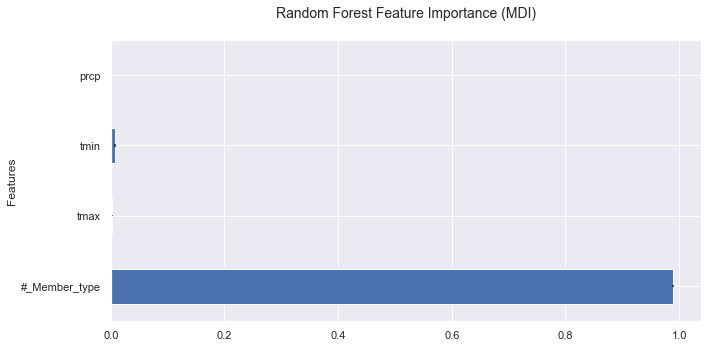

In [117]:
# Construct the feature importance vector based on the feature_importances_ method.

feature_importances = regressor_opt.feature_importances_
feature_names = df_X_casual.columns
print(feature_importances)
print(feature_names.values)

# Form a series using the feature importance. The series is indexed by the feature variables.

forest_importances = pd.Series(feature_importances, index=feature_names)

# Compute the standard deviations of the feature importances

std = np.std([tree.feature_importances_ for tree in regressor_opt.estimators_], axis=0)

# Plot the feature importances

fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title('Random Forest Feature Importance (MDI)\n', fontsize=14)
ax.set_ylabel('Features')
fig.tight_layout()

### Discussion 17:

From the printout, the number of casual riders is the strongest feature. Other features are hardly noticeable. Indeed, the number of casual riders captures 99% of the correlation between the total rental durations and the feature variables. Hence, this analysis confirms our intuition of the relationship beteen the number of casual riders and the total rental durations.


## IV.5 Data Analysis: Probing the Correlation Between Bike Usage Patterns and Weather Using Random Forest Regression for All Riders

From Discussions 16 and 17, we want to assess the correlation between the weather and the bike usage patterns. Now, we will analyze the correlation between 'all' bike riders, casual and member, and remove the total number of casual riders from the dataset at the same time. 

In order to include both types of bike riders, which are categorical variables, we resort to using an encoding method for categorical variables. 

### IV.5.1 Pre-processing Data: One-Hot Encoding as Feature Engineering

We prefer the One-Hot Encoding over the Label Encoding because the latter is known to result in data biases since machine learning algorithms may misinterpret the numerical algorithms of label encoding with numerical ranking.

Below, we remove the total number of riders from the dataset and encode the membership type with One-Hot Encoding. The two blocks of code below implement these steps and print out the dataframes for verification.

In [118]:
# Import the module required for One-Hot Encoding.

from sklearn.preprocessing import OneHotEncoder

# Encode the membership type. The encoder generates two new columns, each represents
# a membership type encoded by '0' and '1'.

onehotencoder = OneHotEncoder()
M = onehotencoder.fit_transform(df.Member_type.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(M, columns = ['Casual', 'Member'])
df2 = pd.concat([df, dfOneHot], axis=1)
df3 = df2.drop(['Member_type'], axis=1)
df3

,Date,#_Member_type,Total_duration,tmax,tmin,prcp,duration_hrs,Casual,Member
0,2019-01-01,1083.0,3296047.0,64.0,44.1,0.00,915.568611,1.0,0.0
1,2019-01-01,3457.0,3547830.0,64.0,44.1,0.00,985.508333,0.0,1.0
2,2019-01-02,660.0,1643993.0,48.0,42.1,0.00,456.664722,1.0,0.0
3,2019-01-02,5907.0,4359620.0,48.0,42.1,0.00,1211.005556,0.0,1.0
4,2019-01-03,938.0,2176528.0,51.1,39.9,0.00,604.591111,1.0,0.0
...,...,...,...,...,...,...,...,...,...
725,2019-12-29,1198.0,847064.0,53.1,44.1,0.60,235.295556,0.0,1.0
726,2019-12-30,724.0,1403961.0,66.0,45.0,0.26,389.989167,1.0,0.0
727,2019-12-30,4695.0,3713818.0,66.0,45.0,0.26,1031.616111,0.0,1.0
728,2019-12-31,650.0,1595133.0,54.0,43.0,0.00,443.092500,1.0,0.0


In [141]:
# Remove the number of bike riders. Again, let the total rental duration be 
# the dependent y-variable. The feature variables now comprise: the maximum temperature.
# the minimum temperature, the precipation level, the encoded casual type, 
# and the encoded member type.

y = df3.duration_hrs.values
X = df3.drop(['#_Member_type','Total_duration','duration_hrs','Date'], axis=1).values
df_X = df3.drop(['#_Member_type','Total_duration','duration_hrs','Date'], axis=1)
df_X

,tmax,tmin,prcp,Casual,Member
0,64.0,44.1,0.00,1.0,0.0
1,64.0,44.1,0.00,0.0,1.0
2,48.0,42.1,0.00,1.0,0.0
3,48.0,42.1,0.00,0.0,1.0
4,51.1,39.9,0.00,1.0,0.0
...,...,...,...,...,...
725,53.1,44.1,0.60,0.0,1.0
726,66.0,45.0,0.26,1.0,0.0
727,66.0,45.0,0.26,0.0,1.0
728,54.0,43.0,0.00,1.0,0.0


### IV.5.2 Pre-processing Data: Scale & Transform Data for Random Forest Regression

Once the y-variable and the feature variable are defined, the remaining steps are identical to those in Section IV.4.3. That is, the dataset is split into two with one subset containing 1/4 of the data points for testing. The other 3/4 data points are used for training. 

The test and training features are scaled and transformed properly by using the StandardScaler function in the Sklearn module.

In [142]:
# Import relevant modules for scaling and transforming the dataset

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler  

# Split the dataset into training and test datasets

X_train, X_test, y_train, y_test = \
          train_test_split(X, y, test_size=0.25, random_state=40, shuffle=True)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Scale and transform the datasets before using them for regression

SS = StandardScaler()    
X_train= SS.fit_transform(X_train)    
X_test = SS.transform(X_test) 

Shape of X_train: (547, 5)
Shape of X_test: (183, 5)
Shape of y_train: (547,)
Shape of y_test: (183,)


### IV.5.3 Finding an Optimal Random Forest Regressor

The steps below are identical to those in Section IV.4.4. 

In [143]:
# Import modules for constructing a Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Initialize the RandomForestRegressor constructor

model = RandomForestRegressor()

# Define the hyperparameters involved in Random Forest Regression.

parameters = {'max_depth':range(3,7),'n_estimators':range(5,100,5),'min_samples_leaf':range(1,10)}

# Create a GridSearch object with 10-fold cross validation to find an optimal set
# of hyperparameters.

GridSearch = GridSearchCV(model, param_grid=parameters, cv=10, n_jobs=-1, refit=True)

# Determine the optimal paramters by fitting the GridSearch object to the training dataset

results_fit = GridSearch.fit(X_train, y_train)
best_params = results_fit.best_params_

print("The best hyperparameters:", best_params)

# Construct the optimal Random Forest Regressor

regressor_opt = RandomForestRegressor(max_depth=best_params['max_depth'], 
                                         n_estimators=best_params['n_estimators'])

regressor_opt.fit(X_train, y_train)

# Compute the predicted values of the test dataset.

predictions = regressor_opt.predict(X_test)

scores = cross_val_score(regressor_opt, X_train, y_train, cv=10)

The best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 9, 'n_estimators': 75}


In [144]:
print(scores)

[0.79339612 0.50646006 0.72884995 0.74828693 0.74865616 0.7897584
 0.7642805  0.7163871  0.78452046 0.90678338]


### Discussion 18:

Compared to the results in Section IV.4.4, the cross-validation scores now drop to around 0.75. The optimal set of hyperparameters comprises a total of 75 5-layered decision trees with 9 minimum samples for a leaf. 
  

### IV.5.4 Performance Assessment of Random Forest Regressor

Using the predicted values computed by the optimal Random Forest Regressor, we can create the plot below that visually shows how the actual values differ from the predicted values on the test data points.

In addition, the R^2 score is also computed based on this difference. The two blocks of code below implement these performance assessments.

Text(0.5, 1.0, 'Predicted vs. Actual Values for Bikeshare Casual & Members Riders via Random Forest Regression\n')

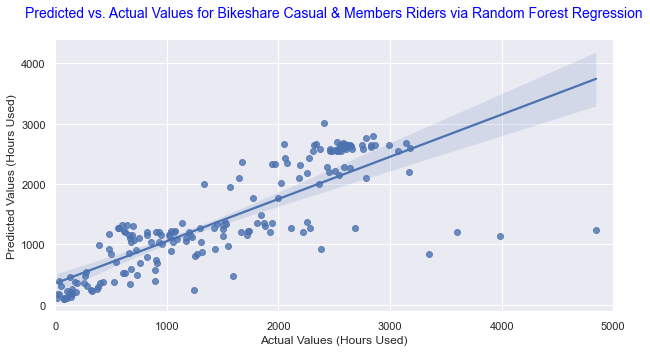

In [145]:
# Import the graphic modules

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,5)})

# Make a Seaborn scatter plot for the actual and predicted values. The latter were obtained 
# from the Random Forest Regressor.

ax = sns.regplot(x = y_test, y = predictions)
title ='Predicted vs. Actual Values for Bikeshare Casual & Members Riders via Random Forest Regression\n'
xlabel='Actual Values (Hours Used)'
ylabel='Predicted Values (Hours Used)'
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.set_xlim(0, 5000)
ax.set_title(title, color='Blue', fontsize=14)

In [146]:
from sklearn.metrics import r2_score
r2_score(predictions, y_test )

0.530368824567061

### Discussion 19:

The R^2 score, which shows the prediction accuracy, now drops to around 53% without the inclusion of the total number of bike riders. The graph also confirms a less accurate prediction on the test data points. Nevertheless, the lower accuracy indicates a weaker relationship between the total rental durations and other feature variables.

The code below examines the strength/importance of each feature in the prediction of the total rental durations. The steps are identical to those in Section IV.4.5.

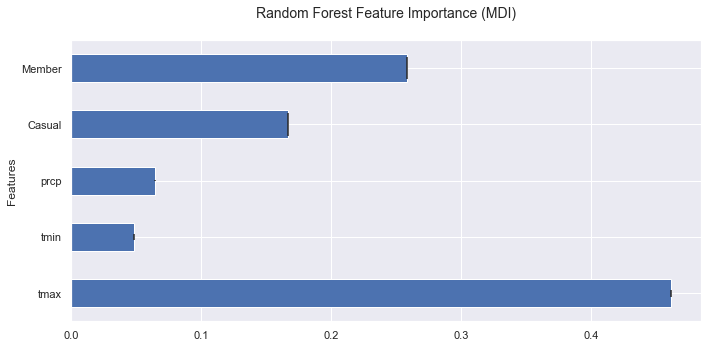

In [147]:
# Construct the feature importance vector based on the feature_importances_ method.

feature_importances = regressor_opt.feature_importances_
feature_names = df_X.columns

# Form a series using the feature importance. The series is indexed by the feature variables.

forest_importances = pd.Series(feature_importances, index=feature_names)

# Compute the standard deviations of the feature importances 

std = np.std([tree.feature_importances_ for tree in regressor_opt.estimators_], axis=0)

# Plotting the feature importances

fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title('Random Forest Feature Importance (MDI)\n', fontsize=14)
ax.set_ylabel('Features')
fig.tight_layout()

In [148]:
print(feature_importances)


[0.46202131 0.04802769 0.06462809 0.16659338 0.25872954]


### Discussion 20:

Now, without the presence of the total number of bike riders, the relevance of the features in the weather dataset appears. From the plot and the numerical output of the feature importances, the maximum temperature is the strongest predictor of the total rental durations. We also see the bike riders with membership contribute to the second strongest predictor based on the Random Forest Regressor.  

Hence, although the temperatures are not strong predictors compared to the total number of bike riders, the correlation between the maximum temperature and the total rental durations is certainly present. This correlation explains the observation made in Section 4.3.

## V. Conclusion

In this tutorial, we worked on two disparate datasets that were collected for different purposes. The tutorial guides the audience through various phases of data mining, from automatically downloading and extracting multiple datasets to assessing the performance of a data analysis task. In between, we had to tidy up and pre-process data in many different ways, including the tasks of scaling, transforming, and merging datasets. All of these tedious tasks are essential for boosting the accuracy of data analysis.

In analyzing the two datasets for patterns and correlated features, machine learning techniques such as feature engineering and Support Vector Regression or Random Forest Regression are used to predict trends in the dataset as well as to understand the potential correlations between the feature variables. We also employed various visualization and computational approaches to detect anomalies and interpret them using other information.

There are several directions to extend this tutorial. First, one can add more data collected from other years to improve the analyses carried out above. Second, one can carry out a similar study for the year 2020 to assess the impacts of COVID-19 on the Capital Bike Share program. Third, one can cleanse the bike sharing datasets so that the information about the bike stations can be used to study the movement patterns between bike stations. Presently, these datasets contain incomplete information for the addresses of the bike stations. Consequently, it would be time consuming to manually fill in the missing information such as the zip code or a nearby address so that the a bike station can readily be plotted in Python through the Folium module. Finally, assuming that these bike stations can automatically be pinpointed on a map with the longitude-latitude coordinates, it will be possible to perform machine learning on graphs to discover more patterns that could not be found otherwise using the standard feature vectors.



## VI. References

[1] U.S. Dept. of Transportation. Bike Sharing Popularity Grows as System Matures. https://www.transportation.gov/utc/bike-sharing-popularity-grows-system-matures.

[2] Scikit-Learn. Cross-validation: evaluating estimator performance. https://scikit-learn.org/stable/modules/cross_validation.html

[3] James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An Introduction to Statistical Learning: With Applications in R. Corrected edition. New York: Springer, 2013.

[4] Scikit-Learn. Ensemble Method: Random Forest Classifier. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.